## 딥러닝 진행 순서
1. 데이터 준비
2. 딥러닝 설계
3. 학습
4. 테스트
5. 평가

In [2]:
import tensorflow as tf # v.2.4.1
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

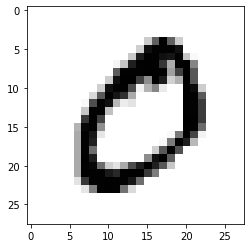

In [8]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[1])

0


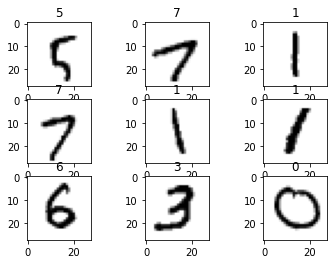

In [10]:
fig, axes = plt.subplots(3,3)
for ax, i in zip(axes.flat, range(10)):
    ax.imshow(x_train[i+100],cmap=plt.cm.binary)
    ax.set_title(y_train[i+100])
plt.show()

In [11]:
# 데이터 전처리
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
np.min(x_train_norm), np.max(x_train_norm)


(0.0, 1.0)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
# 딥러닝 네트워크 모델에서 input_shape가 (28,28,1)이었으므로
# 들어갈 데이터도 그에 맞게 변형시켜줘야 한다.
x_train_reshaped = x_train_norm.reshape(-1, 28,28,1)
x_test_reshaped = x_test_norm.reshape(-1, 28,28,1)

print(f"{x_train_norm.shape} -> {x_train_reshaped.shape}")
print(f"{x_test_norm.shape} -> {x_test_reshaped.shape}")

(60000, 28, 28) -> (60000, 28, 28, 1)
(10000, 28, 28) -> (10000, 28, 28, 1)


In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4247 - accuracy: 0.8700
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [20]:
# 성능 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(test_loss, test_accuracy)

313/313 - 1s - loss: 0.0401 - accuracy: 0.9896
0.04014717414975166 0.9896000027656555


In [21]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

index = 0
print(f"predict() 결과 : {predicted_result[index]}")
print(f"확률이 높은 결과 : {predicted_labels[index]}")
print(f"실제 정답 : {y_test[index]}")

predict() 결과 : [4.4738124e-12 5.9357025e-10 1.8704942e-09 6.9748269e-09 1.0667462e-08
 1.5410965e-13 1.2466806e-17 9.9999988e-01 6.8132289e-13 7.4864701e-08]
확률이 높은 결과 : 7
실제 정답 : 7


예측 확률 : [6.5961854e-06 1.1889973e-01 2.7335124e-04 2.2994862e-05 9.2270738e-04
 2.1945156e-07 1.7732054e-08 8.8614285e-02 6.7190222e-02 7.2406983e-01]
라벨 : 7 결과 : 9


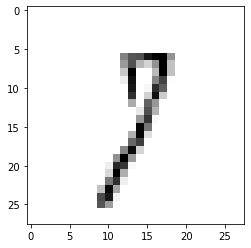

예측 확률 : [1.8554108e-06 1.3292765e-06 3.8704820e-04 3.8543172e-04 9.0533922e-06
 7.0566884e-08 3.1864018e-11 9.9642867e-01 2.7565812e-03 2.9979848e-05]
라벨 : 8 결과 : 7


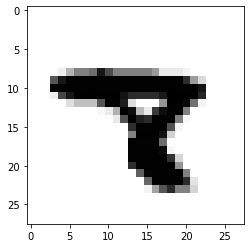

예측 확률 : [1.2596567e-04 7.1093959e-01 8.7850457e-03 2.7957466e-01 2.8674465e-05
 1.0980159e-09 2.2412449e-11 5.2083586e-04 2.6907767e-07 2.5005091e-05]
라벨 : 3 결과 : 1


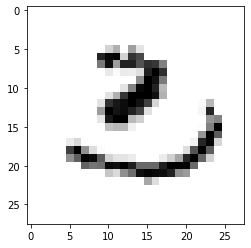

예측 확률 : [4.3572066e-09 7.3711185e-08 3.2621230e-08 1.4151792e-02 7.2922390e-05
 8.2510084e-01 1.4163065e-06 5.0521061e-07 8.3618974e-03 1.5231052e-01]
라벨 : 9 결과 : 5


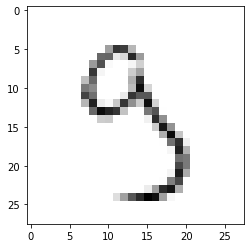

예측 확률 : [2.4617489e-07 1.0433976e-05 1.2055400e-09 8.6404102e-09 1.3505319e-01
 9.1905193e-08 4.3418178e-05 2.5350606e-09 4.7391333e-04 8.6441875e-01]
라벨 : 4 결과 : 9


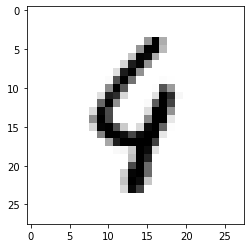

In [23]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print(f"예측 확률 : {predicted_result[n]}")
    print(f"라벨 : {y_test[n]} 결과 : {predicted_labels[n]}")
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [25]:
def network_test(n_conv_1 = 16, n_conv_2 = 32, n_dense = 32, n_train_epoch = 10):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_conv_1,(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D((2,2)))
    model.add(keras.layers.Conv2D(n_conv_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPool2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

    test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
    print(f"loss : {test_loss}, accuracy : {test_accuracy}")

In [32]:
# 첫번째 layer 파라미터 
# network_test(20)
# 두번째
#network_test(20, 34)
network_test(20, 34, 35, 15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4066 - accuracy: 0.8740
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9792
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9866
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9953
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0097 - accuracy: 0.9966
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [91]:
# 이미지 압출 푸는 소스
"""
import zipfile
def unzip_file(root_path,foldername):
    path = root_path+foldername
    zip_file_names = [fn for fn in os.listdir(path) if fn.endswith('zip')]
    print(zip_file_names)
    count = 0
    for zip_name in zip_file_names:
        with zipfile.ZipFile(path+'/'+zip_name) as myzip:            
            image_list = myzip.infolist()
            for i, image in enumerate(image_list):
                image.filename = f'{foldername}_{i+count}'
                myzip.extract(image, path=root_path+'/extracted/'+foldername)
            count += len(image_list)
            print(f'count{count}')
"""            

In [92]:
"""
import os
path = os.getenv('HOME')+'/aiffel/rock_scissor_paper_data/'
for foldername in os.listdir(path):
    print(foldername)
    unzip_file(path,foldername)
"""

rock
['rock.zip', 'rocks_complete.zip', 'rock(1).zip', 'rock(3).zip', 'rock(2).zip']
count100
count1205
count1305
count1405
count1505
paper
['papers_complete.zip', 'paper(2).zip', 'paper.zip', 'paper(1).zip', 'paper(3).zip']
count1108
count1208
count1308
count1408
count1508
scissor
['scissor(2).zip', 'scissor.zip', 'scissors.zip', 'scissors_complete.zip', 'scissor(1).zip']
count100
count200
count300
count1294
count1394


In [90]:
os.listdir(path+'rock')

['rock.zip',
 'rocks_complete.zip',
 'extracted',
 'rock(1).zip',
 'rock(3).zip',
 'rock(2).zip']

In [55]:
file_names

['paper(21).jpg',
 'paper(17).jpg',
 'paper(25).jpg',
 'paper(60).jpg',
 'paper(11).jpg',
 'paper(28).jpg',
 'paper(65).jpg',
 'paper(893).jpg',
 'paper(513).jpg',
 'paper(1023).jpg',
 'paper(160).jpg',
 'paper(560).jpg',
 'paper(843).jpg',
 'paper(348).jpg',
 'paper(124).jpg',
 'paper(177).jpg',
 'paper(1035).jpg',
 'paper(355).jpg',
 'paper(552).jpg',
 'paper(849).jpg',
 'paper(962).jpg',
 'paper(188).jpg',
 'paper(629).jpg',
 'paper(612).jpg',
 'paper(105).jpg',
 'paper(452).jpg',
 'paper(842).jpg',
 'paper(433).jpg',
 'paper(637).jpg',
 'paper(1198).jpg',
 'paper(1113).jpg',
 'paper(352).jpg',
 'paper(699).jpg',
 'paper(919).jpg',
 'paper(270).jpg',
 'paper(204).jpg',
 'paper(835).jpg',
 'paper(661).jpg',
 'paper(190).jpg',
 'paper(195).jpg',
 'paper(70).jpg',
 'paper(429).jpg',
 'paper(1093).jpg',
 'paper(883).jpg',
 'paper(851).jpg',
 'paper(1109).jpg',
 'paper(38).jpg',
 'paper(826).jpg',
 'paper(76).jpg',
 'paper(645).jpg',
 'paper(116).jpg',
 'paper(1176).jpg',
 'paper(268).jp